In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline
import seaborn as sns

from fastai.imports import *
from fastai.structured import *
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import math

In [2]:
train_data=pd.read_csv("train.csv")

testing_data=pd.read_csv("test.csv")


train_copy=train_data.copy()

In [3]:
train_data.head(400)

len(train_data)

# train_data['Dependents'].value_counts()

614

In [50]:
'''Factors/Features Which i Think are worth looking into to get into.

1)Married Vs Single People in Getting Loans.
2)Loan Amount and Loan Payment duration.
3)Education and Area
4)Gender(Bias)
5)Self Employed vs Salaried Employee.
6)Previous Loan History.
7)Etc.

'''

'Factors/Features Which i Think are worth looking into to get into.\n\n1)Married Vs Single People in Getting Loans.\n2)Loan Amount and Loan Payment duration.\n3)Education and Area\n4)Gender(Bias)\n5)Self Employed vs Salaried Employee.\n6)Previous Loan History.\n7)Etc.\n\n'

In [5]:
'''Lots Of Categorical Variables Present.Have got all types of values.WIll have to convert all of them into numerical variables
for further processing'''

Gender_counts=train_data['Gender'].value_counts()
Married_Counts=train_data['Married'].value_counts()
Dependents_count=train_data['Dependents'].value_counts()
Self_Employed=train_data['Self_Employed'].value_counts()
Area_Stay=train_data['Property_Area'].value_counts()
Loan_Terms=train_data['Loan_Amount_Term'].value_counts()
Credit_History=train_data['Credit_History'].value_counts()

print(Gender_counts)
print("\n")
print(Married_Counts)
print("\n")
print(Dependents_count)
print("\n")
print(Self_Employed)
print("\n")
print(Area_Stay)
print("\n")
print(Loan_Terms)
print("\n")
print(Credit_History)

Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [52]:
'''No of Males which have 0 dependents and no of females which have 0 dependents'''

'No of Males which have 0 dependents and no of females which have 0 dependents'

In [53]:
single_males=train_data[(train_data['Gender']=='Male') & (train_data['Married']=='No')]
single_males

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
28,LP001086,Male,No,0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N
31,LP001095,Male,No,0,Graduate,No,3167,0.0,74.0,360.0,1.0,Urban,N
32,LP001097,Male,No,1,Graduate,Yes,4692,0.0,106.0,360.0,1.0,Rural,N
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
38,LP001114,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban,Y


In [54]:
single_females=train_data[(train_data['Gender']=='Female') & (train_data['Married']=='No')]
single_females

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
49,LP001151,Female,No,0,Graduate,No,4000,2275.0,144.0,360.0,1.0,Semiurban,Y
51,LP001157,Female,No,0,Graduate,No,3086,0.0,120.0,360.0,1.0,Semiurban,Y
52,LP001164,Female,No,0,Graduate,No,4230,0.0,112.0,360.0,1.0,Semiurban,N
64,LP001222,Female,No,0,Graduate,No,4166,0.0,116.0,360.0,0.0,Semiurban,N
69,LP001241,Female,No,0,Graduate,No,4300,0.0,136.0,360.0,0.0,Semiurban,N
80,LP001265,Female,No,0,Graduate,No,3846,0.0,111.0,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y


In [55]:
'''% of Single People Vs Married People'''

single_count=len(single_males)+len(single_females)

married_count=len(train_data)-single_count
percentage=((single_count)/married_count)*100

percentage

'''Observation:Dataset is Balanced in terms of ratio of single vs married people.
Reason for finding out is that my intution is that chances are there that single people might be getting lesser loans maybe
as they are more prone to spending money.'''

'Observation:Dataset is Balanced in terms of ratio of single vs married people.\nReason for finding out is that my intution is that chances are there that single people might be getting lesser loans maybe\nas they are more prone to spending money.'

In [ ]:
null_values=pd.isnull(train_data).sum()

print(null_values)
# '''Quite Few Amount of Null values.Data is Mostly Clean'''

# train_data[pd.isnull(train_data)].index.tolist()
# No of Rows which have Empty Values:134(Around 20% of the data)
len(train_data[train_data.isnull().any(axis=1)].index.tolist())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


134

In [4]:
# def filling_null(df,value,inplace_value=True):
# #     print(df)
#     df.fillna(value,inplace_value)

train_data["Gender"]=train_data["Gender"].fillna("Male")
train_data["Married"]=train_data["Married"].fillna("Yes")
train_data["Dependents"]=train_data["Dependents"].fillna(0)
train_data["Self_Employed"]=train_data["Self_Employed"].fillna("No")
# train_data["LoanAmount"]=train_data["LoanAmount"].fillna(train_data["LoanAmount"].mean(axis=0))
train_data["Loan_Amount_Term"]=train_data["Loan_Amount_Term"].fillna(360.0)
train_data["Credit_History"]=train_data["Credit_History"].fillna(1.0)


train_data['LoanAmount']=train_data['LoanAmount'].fillna(train_data["LoanAmount"].mean(axis=0))
train_data["LoanAmount"]

train_data.drop('Loan_ID',axis=1,inplace=True)

pd.isnull(train_data).sum()
# Filled All missing Data with Most Common Value in All Columns

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

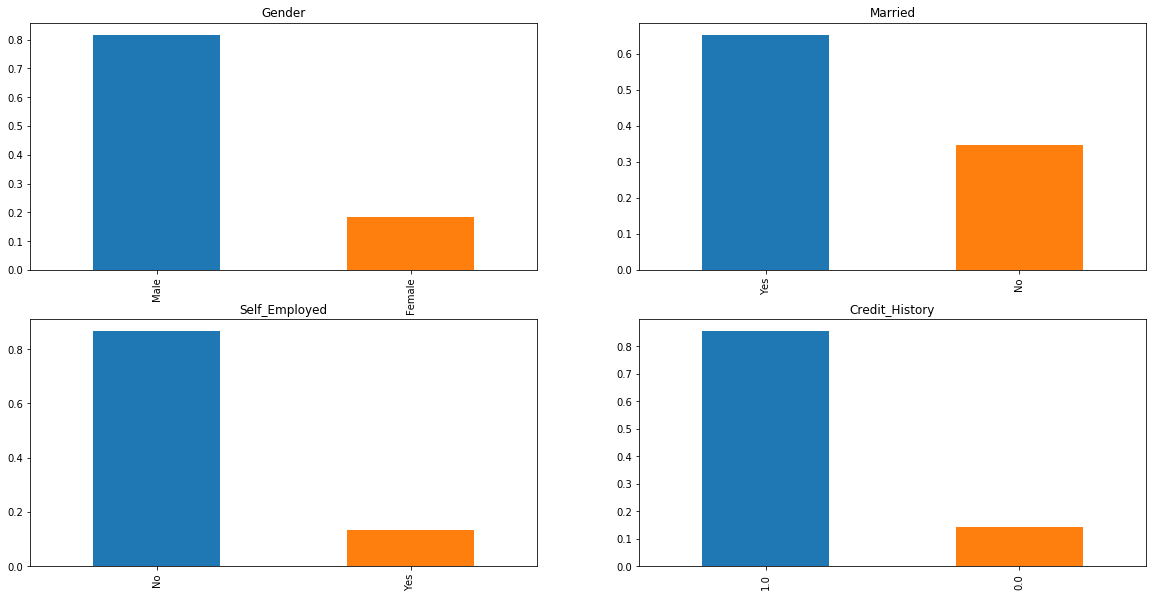

In [ ]:
'''Simple Graphs'''

plt.figure(1)
plt.subplot(221)


train_copy["Gender"]=train_data["Gender"].fillna("Male")
train_copy["Married"]=train_data["Married"].fillna("Yes")
train_copy["Dependents"]=train_data["Dependents"].fillna("0")
train_copy["Self_Employed"]=train_data["Self_Employed"].fillna("No")
# train_data["LoanAmount"]=train_data["LoanAmount"].fillna(train_data["LoanAmount"].mean(axis=0))
train_copy["Loan_Amount_Term"]=train_data["Loan_Amount_Term"].fillna(360.0)
train_copy["Credit_History"]=train_data["Credit_History"].fillna(1.0)


train_copy['LoanAmount']=train_data['LoanAmount'].fillna(train_data["LoanAmount"].mean(axis=0))
# train_data["LoanAmount"]

# train_copy.drop('Loan_ID',axis=1,inplace=True)

# pd.isnull(train_copy).sum()

train_copy['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
train_copy['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
train_copy['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
train_copy['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

# plt.subplot(225)


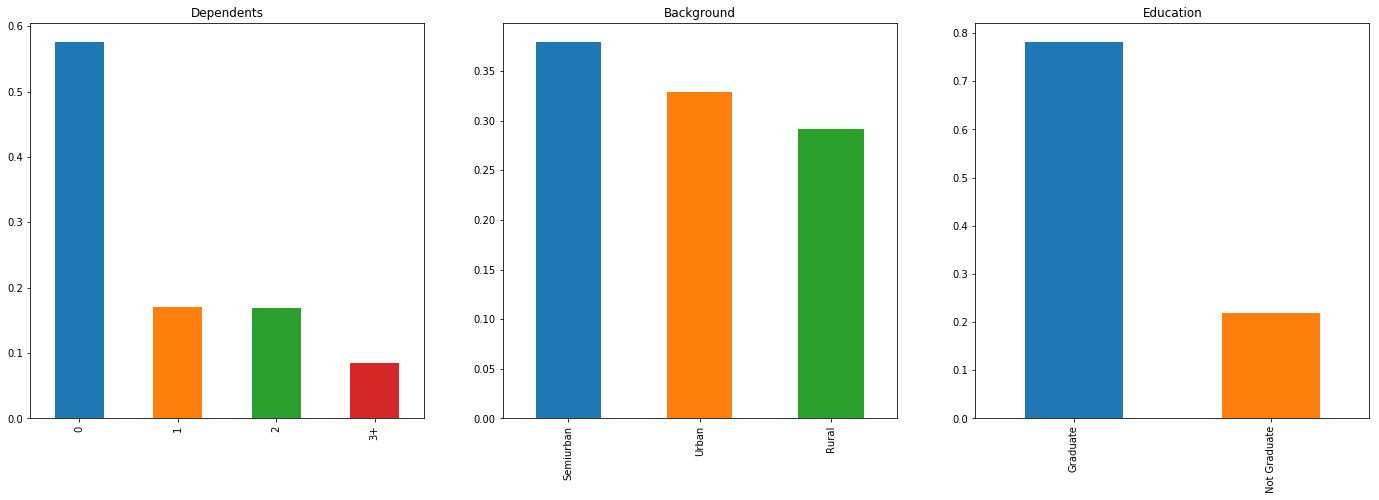

In [4]:
plt.figure(1)

plt.subplot(231)

train_copy['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,16),title='Dependents')

plt.subplot(232)

train_copy['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Background')

plt.subplot(233)
train_copy['Education'].value_counts(normalize=True).plot.bar(title='Education')

Most People Do not have a dependent.(Cannot Differentiate between Child and Adult as Dependent as no info is given about the dependent at all)(60%)

Most People Come From Semiurban Places(Tier 2 Cities for eg)(35%)

Most People are educated.(80%)

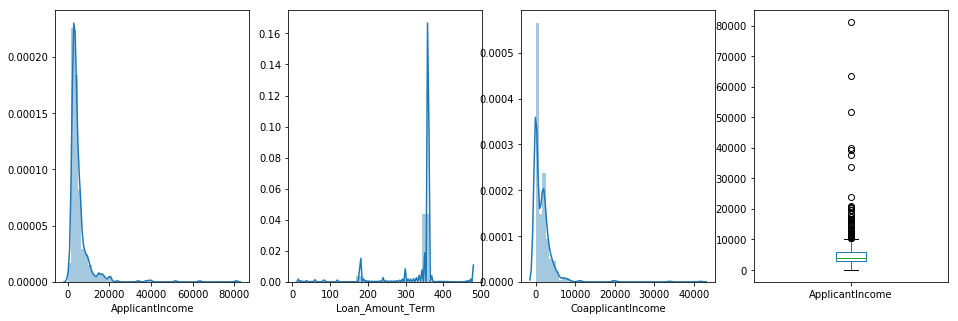

In [28]:
plt.figure(figsize=(14,6))

plt.subplot(141)

sns.distplot(train_copy['ApplicantIncome'])

plt.subplot(142)

sns.distplot(train_copy['Loan_Amount_Term'])

plt.subplot(143)

sns.distplot(train_copy['CoapplicantIncome'])

plt.subplot(144)

train_copy['ApplicantIncome'].plot.box(figsize=(16,5))

Most of The Applicants are from the lower income group(<20000) pm.

Most People Sem to take loan for a year.

Most CoApplicant are also from the low income group

Graduates have irregular incomes.Outliers

Text(0.5,0.98,'')

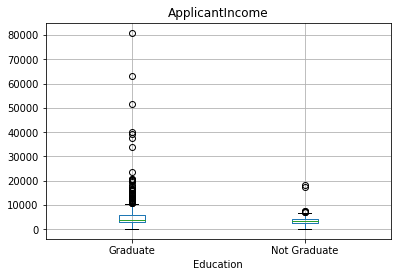

In [7]:
train_copy.boxplot(column="ApplicantIncome",by="Education")
plt.suptitle("")

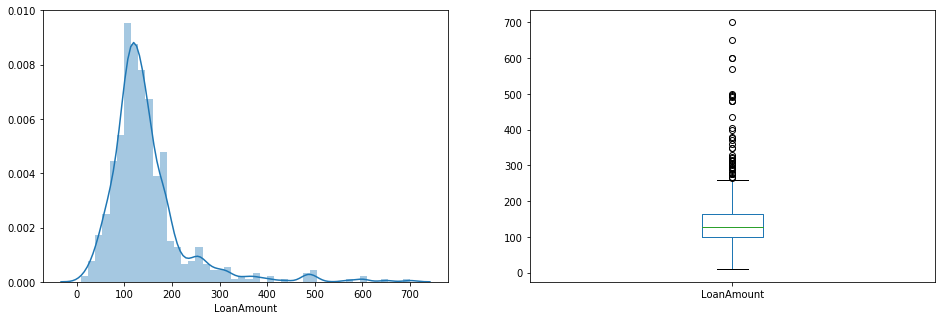

In [27]:
plt.figure(1)
plt.subplot(121)
# df=train.dropna()
sns.distplot(train_copy['LoanAmount']);

plt.subplot(122)
train_copy['LoanAmount'].plot.box(figsize=(16,5))

plt.show()



Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339




Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82




Loan_Status    N    Y
Married              
No            79  134
Yes          113  285




Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56




Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33




Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378




Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133




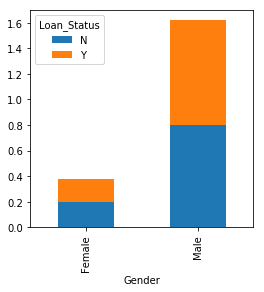

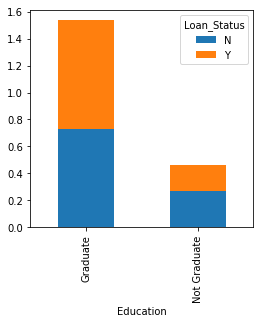

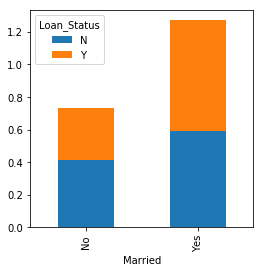

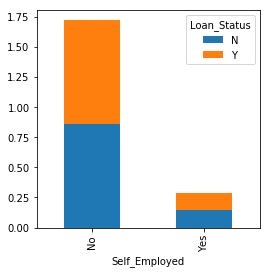

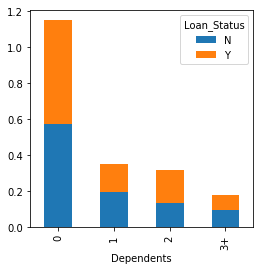

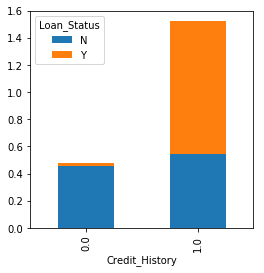

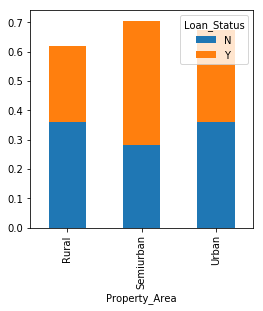

In [9]:
def generate_bivariategraphs(firstarg,secondarg):
    freqtable=pd.crosstab(firstarg,secondarg)
    print("\n")
    print(freqtable)
    print("\n")
    
    freqtable.div(freqtable.sum().astype('float')).plot.bar(stacked="True",figsize=(4,4))

Gender=generate_bivariategraphs(train_copy['Gender'],train_copy['Loan_Status'])
Education=generate_bivariategraphs(train_copy['Education'],train_copy['Loan_Status'])
Married=generate_bivariategraphs(train_copy['Married'],train_copy['Loan_Status'])
Employed=generate_bivariategraphs(train_copy['Self_Employed'],train_copy['Loan_Status'])
Dependents=generate_bivariategraphs(train_copy['Dependents'],train_copy['Loan_Status'])
CreditHistory=generate_bivariategraphs(train_copy['Credit_History'],train_copy['Loan_Status'])
Location=generate_bivariategraphs(train_copy['Property_Area'],train_copy['Loan_Status'])
# Gender.div((Gender.sum().astype(float))).plot.bar(stacked=True,figsize=(4,4))
# Education.div((Education.sum().astype(float))).plot.bar(stacked=True,figsize=(4,4))
# Married.div((Married.sum().astype(float))).plot.bar(stacked=True,figsize=(4,4))
# Employed.div((Employed.sum().astype(float))).plot.bar(stacked=True,figsize=(4,4))

The difference between 2 genders in terms of getting loans is only a minor 3 % apart.Which i believe is not a lot considering the size of the dataset.So i think that there is no relation between the gender and the ability of the person in getting a loan.

The Ratio of People for Graduates getting a loan and non graduates getting a loan are the same

Proportion of married candidates is higher for loan approvals

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
There is nothing significant we can infer from Self_Employed vs Loan_Status plot.
People With Credit History 1 will have high change of getting loan approved.
SemiUrban People have a higher chance of getting loans approved than people in other areas.

No Relation Between Loan Income and Loan Status

Higher the Total Income,better the chances of getting a loan



Loan_Status   N    Y
Income_bin          
Low          34   74
Average      67  159
High         45   98
Very high    46   91




Loan_Status              N    Y
Coapplicant_Income_bin         
Low                      3   19
Average                 61  161
High                    32   65




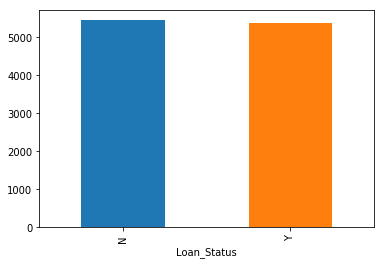

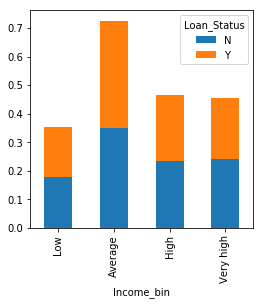

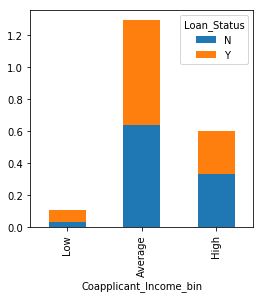

In [10]:
train_copy.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar()


bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train_copy['Income_bin']=pd.cut(train_copy['ApplicantIncome'],bins,labels=group)

income_graph=generate_bivariategraphs(train_copy['Income_bin'],train_copy['Loan_Status'])

bins2=[0,1000,3000,42000]
group2=['Low','Average','High']
train_copy['Coapplicant_Income_bin']=pd.cut(train_copy['CoapplicantIncome'],bins2,labels=group2)

coapplicantincomegraph=generate_bivariategraphs(train_copy['Coapplicant_Income_bin'],train_copy['Loan_Status'])



Loan_Status   N    Y
Effect              
low          14   10
average      32   87
high         65  159
Very High    81  166




Loan_Status       N    Y
LoanAmount_bin          
Low             181  411




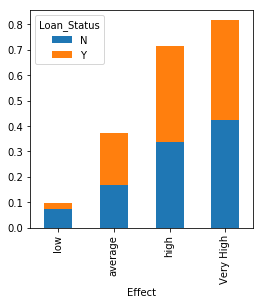

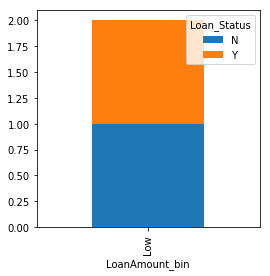

In [19]:
train_copy['Total_Income']=train_copy['ApplicantIncome']+train_copy['CoapplicantIncome']

bins=[0,2500,4000,6000,81000]

labels=['low','average','high','Very High']

train_copy['Effect']=pd.cut(train_copy['Total_Income'],bins=bins,labels=labels)

generate_bivariategraphs(train_copy['Effect'],train_copy['Loan_Status'])


bins2=[0,100,200,700]
group2=['Low','Average','High']
train_copy['LoanAmount_bin']=pd.cut(train_copy['LoanAmount'],bins,labels=group)


generate_bivariategraphs(train_copy['LoanAmount_bin'],train_copy['Loan_Status'])

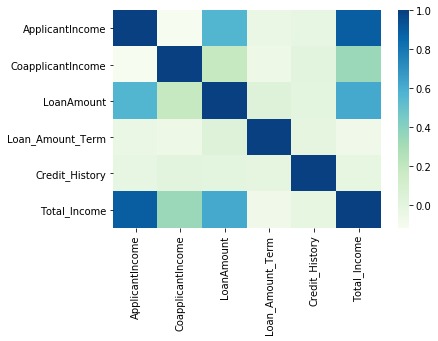

In [50]:
# train_copy.drop(['Loan_ID'],inplace=True,axis=1)

train_cats(train_copy)

cat_columns=train_copy.select_dtypes(['category'])

cat_columns.apply(lambda x:x.cat.codes)
# train_copy.dtypes
freq_table=train_copy.corr()

sns.heatmap(freq_table,cmap='GnBu')

# train_copy.columns

# freq_table

In [54]:
sample_df=pd.DataFrame([[1.3,-1.2,-0.1,0.5,-0.8],[1.6,-1.0,-0.2,0.3,-0.6]])

# sample_df.head(5)

sample_df.corr()

,0,1,2,3,4
0,1.0,1.0,-1.0,-1.0,1.0
1,1.0,1.0,-1.0,-1.0,1.0
2,-1.0,-1.0,1.0,1.0,-1.0
3,-1.0,-1.0,1.0,1.0,-1.0
4,1.0,1.0,-1.0,-1.0,1.0


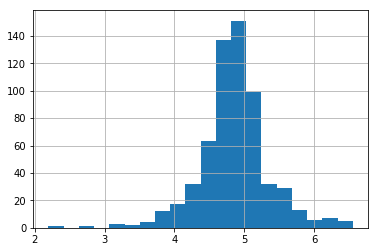

In [60]:
# train_data.isnull().sum()
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
# train_data.isnull().sum()

train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])
train_data['LoanAmount_log'].hist(bins=20)
# test['LoanAmount_log'] = np.log(test['LoanAmount'])

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

In [59]:
'''Analysis
Q1)Do Self Employed People get More Loans?(Company People are more liable to get a loan)

Q2)Are Urban Graduates Who are Employed Get better Loans(Contradict My Intuition)?Nope.(112)
Other Population Ranges Might be Getting More Loans.(Urban Not Graduates do not get a loan at all.)
Semi Urban Graduates Get Some Loans(144)
Rural Grads Get 84 Loans.
Rural Not Grads have got 26 Loans.I think There exists some correlation between you being a graduate(Education and your Area(Urban
Rural,Semi Urban in order to get a loan))


'''

loan_self=train_data[(train_data['Self_Employed']=="Yes") & (train_data['Loan_Status']=="Y")]
loan_notself=train_data[(train_data['Self_Employed']=="No") & (train_data['Loan_Status']=="Y")]

# len(loan_self)
loan_urb_gradu=train_data[(train_data['Education']=="Graduate") & (train_data['Loan_Status']=="Y") & (train_data['Property_Area']=="Urban") ]
len(loan_urb_gradu)

112

In [78]:
'''Corellation HeatMap to get Related features(Might Be useful to get new sets of features)'''

train_cats(train_data)

train_data['Property_Area']=train_data['Property_Area'].cat.codes

train_data['Self_Employed']=train_data['Self_Employed'].cat.codes

train_data['Education']=train_data['Education'].cat.codes

train_data['Gender']=train_data['Gender'].cat.codes

train_data['Married']=train_data['Married'].cat.codes

train_data['Dependents']=train_data['Dependents'].cat.codes

train_data['Loan_Status']=train_data['Loan_Status'].cat.codes

train_data.dtypes

Gender                  int8
Married                 int8
Dependents              int8
Education               int8
Self_Employed           int8
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area           int8
Loan_Status             int8
dtype: object

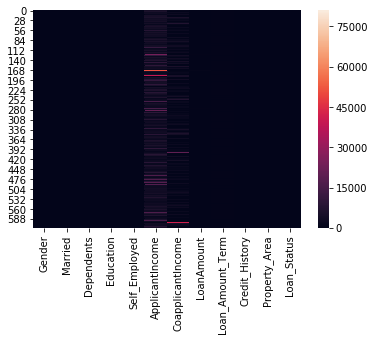

In [87]:
sns.heatmap(train_data)

# train_data

In [39]:
'''Establish Baseline Accuracy(Worst case with no cleaning and all parameters thrown in with Random Forest and Multivariate Reg
ression)'''

train_data=pd.read_csv("train.csv")
train_data.fillna("0",inplace=True)
train_cats(train_data)

labels_training=train_data['Loan_Status'].cat.codes



train_data.drop('Loan_Status',inplace=True,axis=1)
train_data.drop('Loan_ID',inplace=True,axis=1)

# print(train_data)

# train_data.dtypes



train_data['Property_Area']=train_data['Property_Area'].cat.codes

train_data['Self_Employed']=train_data['Self_Employed'].cat.codes

train_data['Education']=train_data['Education'].cat.codes

train_data['Gender']=train_data['Gender'].cat.codes

train_data['Married']=train_data['Married'].cat.codes

train_data['Dependents']=train_data['Dependents'].cat.codes

random_forest=RandomForestClassifier(n_jobs=-1)

random_forest.fit(train_data,labels_training)

# predict??
# predictions=random_forest.predict()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)